In [1]:
import pandas as pd
import numpy as np

In [2]:
encuesta_df = pd.read_csv("Encuesta.csv", sep=";")

In [3]:
### Eliminamos variables (Columnas) Problematicas
encuesta_df.drop(labels=['¿Con quien vives actualmente?',
                         '¿Cuando estudias cuales de los siguientes metodos utilizas?',
                         '¿Qué carrera estudias?',
                         'Al volver a la presencialidad tus notas'], axis=1, inplace=True)

In [4]:
### Resumimos el nombre de las varibales para poder trabajar con mayor facilidad

encuesta_df.rename(columns = {'RUT (Formato: 12.345.678-9)':'RUT',
                              'Edad (Formato: 21)':'EDAD',
                              'Tiempo Promedio de Uso de Redes Sociales (Diario) (Horas)':'T_RRSS',
                              '¿Cuántos ramos tienes actualmente?':'N_Ramos',
                              '¿Cuántas horas a la semana realizas deporte?':'H_Deporte',
                              '¿Cuántas horas duermes aproximadamente?':'H_Sueño',
                              '¿A que tipo de colegio asistías?':'Tip_Colegio',
                              'Ingreso Familiar aproximadamente (Del Hogar)':'I_Hogar',
                              'Tiempo Promedio Estudio (Semana) (Horas)':'T_Estudio',
                              'Nivel Maximo de Estudios completado por tu Padre':'NE_Padre',
                              'Nivel Maximo de Estudios completado por tu Madre':'NE_Madre',
                              '¿Cuando estudias para una evaluacion de que forma lo haces?':'F_Estudio',
                              '¿Cuantas veces faltas a clases mensualmente en promedio?':'Ausencias',
                              '¿Consume alguna de la siguientes drogas?':'Drogas',
                              '¿Posees algun tipo de tratamiento controlado por medicamentos?':'Bajo_Medicamentos',
                              '¿Quién fue tu cuidador principal durante la infancia temprana?':'Cuidador',
                              '¿Cómo consideras que fue esa relación con tu cuidador?':'R_Cuidador',
                              '¿Cuánto tiempo te demoras desde tu casa a la universidad?':'T_Traslado',
                              '¿Tienes incapacidad de relajarte y estar tranquilo?':'IC_Relajo',
                              '¿Has tenido un aumento del apetito ultimamente?':'Apetito',
                              '¿Has tenido dificultad para conciliar el sueño ultimamente?':'Sueño'},inplace = True)

In [5]:
# Necesitamos extraer las variables Dummy
dummy_cols = ['Sexo',
              'Tip_Colegio',
              'F_Estudio',
              'Drogas',
              'Bajo_Medicamentos',
              'Cuidador',
              'IC_Relajo',
              'Apetito',
              'Sueño'] 

# Import pandas as pd
df_procesado = pd.get_dummies(encuesta_df, columns = dummy_cols)


# Además transformaremos las variables que poseen magnitud
ordinal_cols = ['I_Hogar',
                'T_Estudio',
                'NE_Padre',
                'NE_Madre',
                'R_Cuidador',
                'T_Traslado',
                'Ausencias'] 


df_procesado["I_Hogar"].replace({"Entre $0 - $500.000": 1, "Entre $500.001- $750.000": 2, "Entre $750.001- $1.000.000": 3, "Entre $1.000.001- $1.500.000": 4, "Entre $1.500.001- $2.000.000": 5, "Entre $2.000.001- $3.500.000": 6, "$3.500.001 o más": 7}, inplace=True)

df_procesado["T_Estudio"].replace({"0 a 3 horas": 1, "3 a 6 horas": 2, "7 a 10 horas": 3, "10 horas o mas": 4}, inplace=True)

df_procesado["NE_Padre"].replace({"Educación Básica": 1, "Educación Media": 2, "Educación Técnica Profesional": 3, "Educación Universitaria": 4, "Master/Diplomado o Equivalente": 5, "Doctorado o Equivalente": 6}, inplace=True)

df_procesado["NE_Madre"].replace({"Educación Básica": 1, "Educación Media": 2, "Educación Técnica Profesional": 3, "Educación Universitaria": 4, "Master/Diplomado o Equivalente": 5, "Doctorado o Equivalente": 6}, inplace=True)

df_procesado["R_Cuidador"].replace({"Muy mala": 1, "Mala": 2, "Regular": 3, "Buena": 4, "Muy buena": 5}, inplace=True)

df_procesado["T_Traslado"].replace({"Desde 1 a 15 Minutos": 1, "Desde 16 a 30 Minutos": 2, "Desde 31 a 60 Minutos": 3, "Desde 1 Hora a 2 Horas": 4, "2 Horas o mas": 5}, inplace=True)

df_procesado["Ausencias"].replace({"No falto a clases": 0, "De 1 a 2": 1, "De 3 a 6": 2, "De 7 a 10": 3, "11 o mas": 4}, inplace=True)

In [6]:
#Elimnamos los valores erroneos
df_procesado.dropna(axis=0, inplace=True)
df_procesado.to_csv("df_procesado.csv", index=False)

# Trabajo Con Modelos de Machine Learning

## Random Forests

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [8]:
df_rforest = pd.read_csv('df_procesado.csv')

In [9]:
#Definimos las variables explicativas
feature_names = ['EDAD', 'I_Hogar', 'T_RRSS', 'T_Estudio', 'NE_Padre', 'NE_Madre',
       'Ausencias', 'R_Cuidador', 'T_Traslado', 'N_Ramos', 'H_Deporte',
       'H_Sueño', 'Sexo_Femenino', 'Sexo_Masculino',
       'Tip_Colegio_Particular', 'Tip_Colegio_Publico (Municipal)',
       'Tip_Colegio_Subvencionado', 'F_Estudio_Ambas', 'F_Estudio_Con amigos',
       'F_Estudio_Solo', 'Drogas_Alcohol', 'Drogas_Alcohol, Cigarro',
       'Drogas_Alcohol, Cigarro, Marihuana', 'Drogas_Alcohol, Marihuana',
       'Drogas_No Consume', 'Bajo_Medicamentos_No', 'Bajo_Medicamentos_Si',
       'Cuidador_Abuela/o', 'Cuidador_Asesora del hogar (Nana)',
       'Cuidador_Madre', 'Cuidador_Padre', 'IC_Relajo_A veces',
       'IC_Relajo_Nada', 'IC_Relajo_Siempre', 'Apetito_A veces',
       'Apetito_Nada', 'Apetito_Siempre', 'Sueño_A veces', 'Sueño_Nada',
       'Sueño_Siempre']

X = df_rforest[feature_names]
Y = df_rforest.Nota_Prueba_2

In [10]:
# Creamos la division entre el test y el train sets
train_X, val_X, train_Y, val_Y = train_test_split(X, Y,random_state = 0)
# Entrenamos al modelo
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_Y)

RandomForestRegressor(random_state=1)

In [11]:
# Hacemos las predicciones Correspondientes
forest_model_pred = forest_model.predict(val_X)

In [12]:
# Evaluamos Precision
print(forest_model.score(val_X, val_Y))

-0.3485072022160649


### Evaluemos la significancia de estas varibles

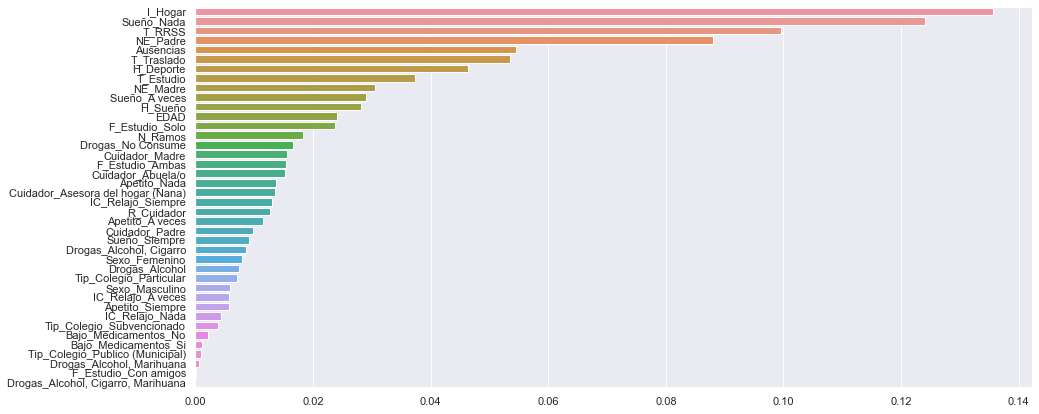

In [35]:
importances = forest_model.feature_importances_

import matplotlib.pyplot as plt
import seaborn as sns


feature_imp = pd.Series(forest_model.feature_importances_, 
                        index=feature_names).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
sns.set(rc={'figure.figsize':(18,7)})

### Considerando los outputs tratemos de mejorar el modelo

In [14]:
df_rforest_2 = pd.read_csv('df_procesado.csv')

In [15]:
#Definimos las variables explicativas
feature_names_2 = ['I_Hogar', 'T_RRSS', 'T_Estudio', 'NE_Padre', 'NE_Madre',
       'Ausencias', 'T_Traslado', 'N_Ramos', 'H_Deporte',
       'H_Sueño', 'F_Estudio_Ambas','F_Estudio_Solo', 'IC_Relajo_Siempre', 'Apetito_A veces',
       'Apetito_Nada', 'Apetito_Siempre', 'Sueño_A veces', 'Sueño_Nada',
       'Sueño_Siempre']

X_2 = df_rforest_2[feature_names_2]
Y_2 = df_rforest_2.Nota_Prueba_2

In [16]:
# Creamos la division entre el test y el train sets
train_X_2, val_X_2, train_Y_2, val_Y_2 = train_test_split(X_2, Y_2,random_state = 0)
# Entrenamos al modelo
forest_model_2 = RandomForestRegressor(random_state=1)
forest_model_2.fit(train_X_2, train_Y_2)

RandomForestRegressor(random_state=1)

In [17]:
# Hacemos las predicciones Correspondientes
forest_model_pred_2 = forest_model_2.predict(val_X_2)

In [18]:
# Evaluamos Precision
print(forest_model_2.score(val_X_2, val_Y_2))

-0.4650786703601102


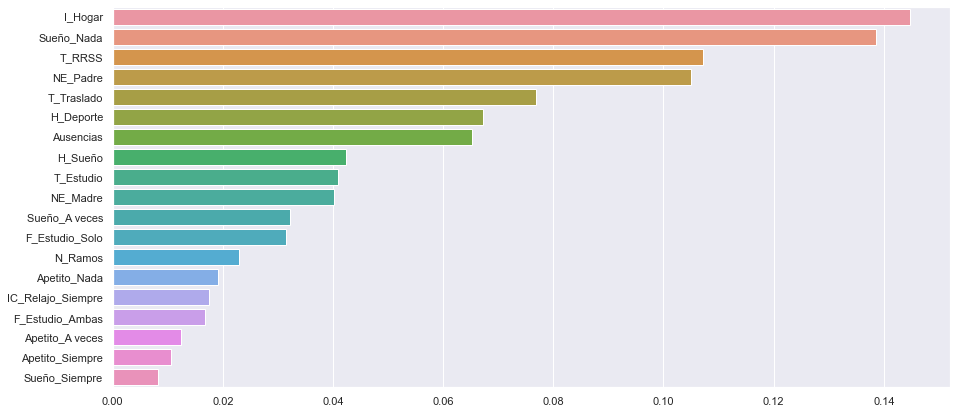

In [19]:
importances = forest_model_2.feature_importances_

import matplotlib.pyplot as plt
import seaborn as sns


feature_imp = pd.Series(forest_model_2.feature_importances_, 
                        index=feature_names_2).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
sns.set(rc={'figure.figsize':(15,7)})

## Regression (SGD stands for Stochastic Gradient Descent)

In [20]:
from sklearn.linear_model import SGDRegressor

In [21]:
df_lr = pd.read_csv('df_procesado.csv')

In [22]:
#Definimos las variables explicativas
feature_names_3 = ['I_Hogar', 'T_RRSS', 'T_Estudio', 'NE_Padre', 'NE_Madre',
       'Ausencias', 'T_Traslado', 'N_Ramos', 'H_Deporte',
       'H_Sueño', 'F_Estudio_Ambas','F_Estudio_Solo', 'IC_Relajo_Siempre', 'Apetito_A veces',
       'Apetito_Nada', 'Apetito_Siempre', 'Sueño_A veces', 'Sueño_Nada',
       'Sueño_Siempre']

X_3 = df_lr[feature_names_3]
Y_3 = df_lr.Nota_Prueba_2

In [23]:
# Creamos la division entre el test y el train sets
train_X_3, val_X_3, train_Y_3, val_Y_3 = train_test_split(X_3, Y_3,random_state = 0)
# Entrenamos al modelo
SGDR_model = SGDRegressor()
SGDR_model.fit(train_X_3, train_Y_3)

SGDRegressor()

In [24]:
# Hacemos las predicciones Correspondientes
SGDR_model_pred = SGDR_model.predict(val_X_3)

In [25]:
# Evaluamos Precision
print(SGDR_model.score(val_X_3, val_Y_3))

-0.3906007417212436


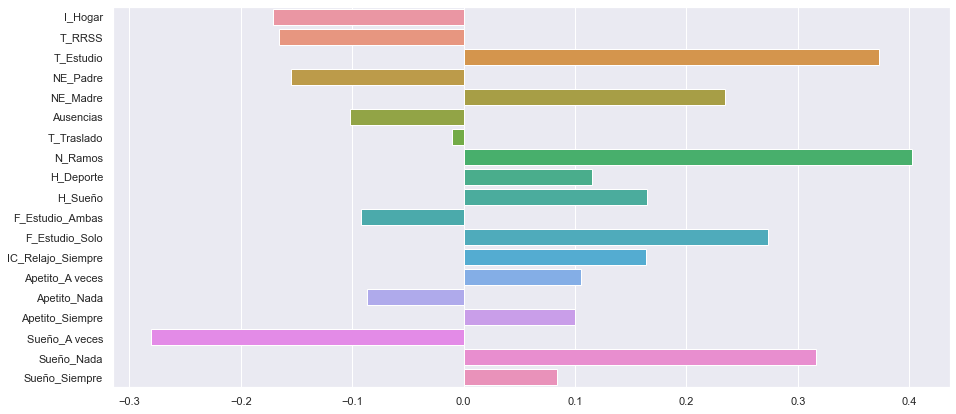

In [26]:
Coeficientes = pd.DataFrame(SGDR_model.coef_, X_3.columns, columns=['Coefficients'])

sns.barplot(x=Coeficientes['Coefficients'].values, y=Coeficientes.index)
sns.set(rc={'figure.figsize':(15,7)})

In [27]:
Coeficientes

,Coefficients
I_Hogar,-0.171262
T_RRSS,-0.166062
T_Estudio,0.373110
NE_Padre,-0.154637
NE_Madre,0.234266
Ausencias,-0.102069
T_Traslado,-0.010423
N_Ramos,0.402099
H_Deporte,0.115328
H_Sueño,0.164641


In [28]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_3)
est = sm.OLS(Y_3, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Nota_Prueba_2   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     1.924
Date:                Sat, 11 Jun 2022   Prob (F-statistic):             0.0401
Time:                        20:19:00   Log-Likelihood:                -88.124
No. Observations:                  64   AIC:                             212.2
Df Residuals:                      46   BIC:                             251.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.8747      1.38

# Nuevo modelo lineal con consideraciones y colinealidades

In [29]:
df_lr_4 = pd.read_csv('df_procesado.csv')

#Definimos las variables explicativas
feature_names_4 = ['I_Hogar', 'T_RRSS', 'T_Estudio', 'NE_Padre', 'NE_Madre',
       'Ausencias', 'T_Traslado', 'N_Ramos', 'H_Deporte',
       'H_Sueño']

X_4 = df_lr[feature_names_4]
Y_4 = df_lr.Nota_Prueba_2

In [30]:
# Creamos la division entre el test y el train sets
train_X_4, val_X_4, train_Y_4, val_Y_4 = train_test_split(X_4, Y_4,random_state = 0)
# Entrenamos al modelo
SGDR_model = SGDRegressor()
SGDR_model.fit(train_X_4, train_Y_4)

SGDRegressor()

In [31]:
# Evaluamos Precision
print(SGDR_model.score(val_X_4, val_Y_4))

-0.5453262302217361


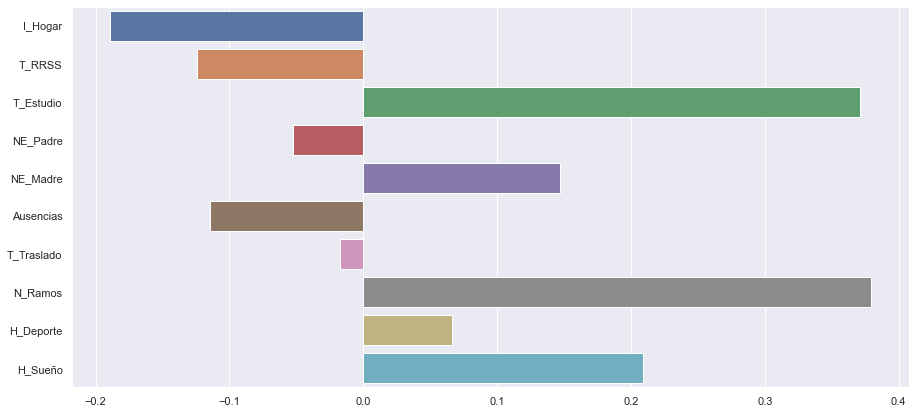

In [32]:
Coeficientes = pd.DataFrame(SGDR_model.coef_, X_4.columns, columns=['Coefficients'])

sns.barplot(x=Coeficientes['Coefficients'].values, y=Coeficientes.index)
sns.set(rc={'figure.figsize':(15,7)})

In [33]:
X2 = sm.add_constant(X_4)
est = sm.OLS(Y_4, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Nota_Prueba_2   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     1.348
Date:                Sat, 11 Jun 2022   Prob (F-statistic):              0.230
Time:                        20:33:54   Log-Likelihood:                -98.056
No. Observations:                  64   AIC:                             218.1
Df Residuals:                      53   BIC:                             241.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3908      2.023      2.170      0.0